# Micro-Credit Defaulter Model Project:

**STATEMENT: A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on.**

**Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.**

**Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients**.

**We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber.**

**They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour.**

**They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah).**

**The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers.** 

**NOTE: Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.**


# Importing dataset:

In [4]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [5]:
#To print all columns and rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [6]:
#importing dataset
df=pd.read_csv("Data file.csv") #Reading csv file
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


Above is my dataset and label is my target column i have to predict the probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.So clearly it's a **Classification problem**.

# Features information:

- label : Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
- msisdn : mobile number of user
- aon : age on cellular network in days
- daily_decr30 : Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
- daily_decr90 : Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
- rental30 : Average main account balance over last 30 days
- rental90 : Average main account balance over last 90 days
- last_rech_date_ma : Number of days till last recharge of main account
- last_rech_date_da: Number of days till last recharge of data account
- last_rech_amt_ma : Amount of last recharge of main account (in Indonesian Rupiah)
- cnt_ma_rech30 : Number of times main account got recharged in last 30 days
- fr_ma_rech30 : Frequency of main account recharged in last 30 days
- sumamnt_ma_rech30 : Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
- medianamnt_ma_rech30 : Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
- medianmarechprebal30 : Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
- cnt_ma_rech90 : Number of times main account got recharged in last 90 days
- fr_ma_rech90 : Frequency of main account recharged in last 90 days
- sumamnt_ma_rech90 : Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)
- medianamnt_ma_rech90 : Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)
- medianmarechprebal90 : Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
- cnt_da_rech30 : Number of times data account got recharged in last 30 days
- fr_da_rech30: Frequency of data account recharged in last 30 days
- cnt_da_rech90 : Number of times data account got recharged in last 90 days
- fr_da_rech90 : Frequency of data account recharged in last 90 days
- cnt_loans30 : Number of loans taken by user in last 30 days
- amnt_loans30: Total amount of loans taken by user in last 30 days
- maxamnt_loans30 : maximum amount of loan taken by the user in last 30 days
- medianamnt_loans30 : Median of amounts of loan taken by the user in last 30 days
- cnt_loans90 : Number of loans taken by user in last 90 days
- amnt_loans90 : Total amount of loans taken by user in last 90 days
- maxamnt_loans90 : maximum amount of loan taken by the user in last 90 days
- medianamnt_loans90 : Median of amounts of loan taken by the user in last 90 days
- payback30 : Average payback time in days over last 30 days
- payback90 : Average payback time in days over last 90 days
- pcircle : telecom circle
- pdate : date

# Preprocessing and EDA:

In [7]:
#Checking shape of dataset
df.shape

(209593, 37)

In this perticular dataset we have 209593 rows and 37 columns.

In [8]:
#Checking all column names
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

Above are the list of column names in the dataset.

In [9]:
#Checking the data types of all columns
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

I have all 3 types of data in dataset they are integer, float and object.pdate should be a datetime datatype so we have to change it from object to datetime datatype.

In [10]:
#Checking the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

There is no null values in the dataset and we can also see the datatypes of each column.

In [11]:
#Checking unique values of each column
df.nunique()

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            147026
daily_decr90            158670
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

'Unnamed:0' is a index column in raw dataset so we can drop it here itself. And pcircle has only one entry throughout so it will have no contribution with our model training we can drop this column also. Also msisdn is a column with phone numbers of users so this column has no contribution on model building.

In [12]:
#Droping Unnamed: 0, msisdn and pcircle column
df = df.drop(["Unnamed: 0"],axis=1)
df = df.drop(["pcircle"],axis=1)
df = df.drop(["msisdn"],axis=1)

In [13]:
#Checking null values in the dataset
df.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pdate                   0
dtype: int64

There is no null values in our dataset.

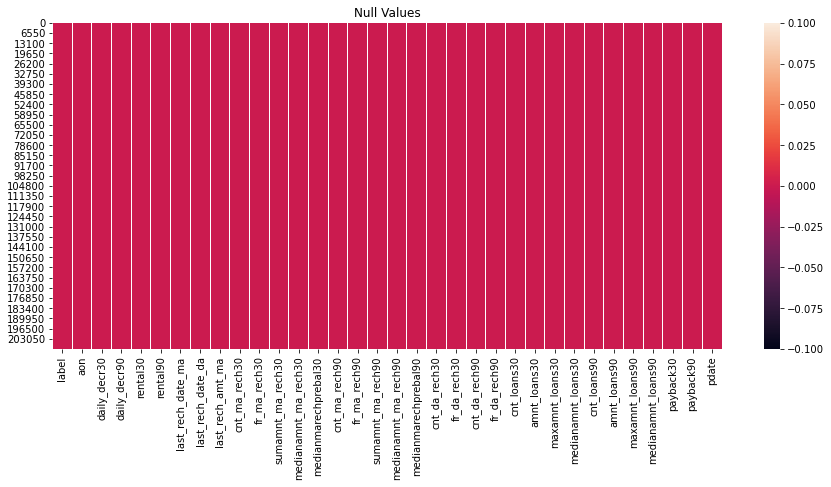

In [14]:
#Visualizeing null values
plt.figure(figsize=[15,6])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

By visualization we can clearly say that there is no null values in the dataset.

In [15]:
#Checking unique values of target column
df['label'].unique()

array([0, 1], dtype=int64)

There is only two unique values in target column so its a binary classification problem.

In [16]:
#Checking for empty observations
df.loc[df['label'] == " "]

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate


There is no empty observations in my target column.

# Feature Extraction:

In [17]:
#Converting object data type to datetime 
df['pdate'] =  pd.to_datetime(df['pdate'])

In [18]:
#Extracting paid year,month and day from pdate

#Extracting year
df["pyear"]=pd.to_datetime(df.pdate, format="%d/%m/%Y").dt.year

#Extracting month
df["pmonth"]=pd.to_datetime(df.pdate, format="%d/%m/%Y").dt.month

#Extracting day
df["pday"]=pd.to_datetime(df.pdate, format="%d/%m/%Y").dt.day

In [19]:
#Droping pdate column after extraction
df = df.drop(["pdate"],axis=1)

I have successfully extracted day, month and year column from pdate column.

In [20]:
#Checking the value counts of pyear column
df.pyear.value_counts()

2016    209593
Name: pyear, dtype: int64

So in pyear column all the entries are of year 2016 keeping all entries same will not help our training so let's drop it.

In [21]:
#Droping pyear column
df = df.drop(["pyear"],axis=1)

In [22]:
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'pmonth', 'pday'],
      dtype='object')

In [23]:
#Checking the value counts of last_rech_date_da column
df.last_rech_date_da.value_counts()

 0.000000         202861
 7.000000            163
 8.000000            160
 11.000000           149
 13.000000           148
 12.000000           147
 17.000000           123
 10.000000           122
 16.000000           121
 9.000000            120
 14.000000           114
 18.000000           113
 25.000000           107
 1.000000            105
 19.000000           105
 20.000000           104
 15.000000           102
 24.000000           102
 34.000000           100
 38.000000            99
 23.000000            96
 27.000000            96
 21.000000            91
 22.000000            91
 29.000000            90
 37.000000            89
 35.000000            83
 33.000000            83
 39.000000            81
 26.000000            80
 31.000000            80
 28.000000            77
 43.000000            77
 32.000000            74
 30.000000            73
 44.000000            71
 42.000000            67
 6.000000             63
 40.000000            61
 52.000000            54


I have 97% zeros in this column.

In [24]:
#Checking the value counts of cnt_da_rech30 column
df.cnt_da_rech30.value_counts()

0.000000        205479
1.000000          2331
2.000000           372
3.000000           156
4.000000            86
5.000000            34
6.000000            27
7.000000            20
9.000000            12
8.000000             9
10.000000            5
11.000000            4
13.000000            3
12.000000            2
16.000000            2
64947.779843         1
75958.268173         1
36030.817550         1
92625.935801         1
36861.348468         1
73471.534303         1
99252.758661         1
19054.032654         1
57023.857849         1
63896.128715         1
61432.889685         1
63515.292535         1
54377.752115         1
38577.270887         1
89889.908088         1
78675.408547         1
93858.951163         1
56844.491308         1
99665.854254         1
94539.793322         1
49967.856780         1
52111.520034         1
57962.682337         1
53545.039477         1
70967.070158         1
89542.300220         1
7326.413613          1
15123.149855         1
25422.31433

I have 98% zeros in this column.

In [25]:
#Checking the value counts of fr_da_rech30 column
df.fr_da_rech30.value_counts()

0.000000         208014
3.000000             64
1.000000             55
2.000000             51
7.000000             47
4.000000             45
6.000000             38
5.000000             36
8.000000             34
10.000000            19
9.000000             19
11.000000            18
12.000000            16
14.000000            15
13.000000            15
15.000000            13
18.000000            11
16.000000             9
19.000000             8
17.000000             6
20.000000             6
23.000000             2
22.000000             2
21.000000             2
689217.968844         1
734218.096710         1
801876.264275         1
760565.757868         1
945977.343130         1
889897.143468         1
725104.930345         1
544990.897761         1
952690.165606         1
533002.607292         1
944024.936529         1
986962.254625         1
659987.398307         1
563456.423464         1
916806.621361         1
760185.522726         1
956693.090731         1
907274.247613   

I have 99% zeros in this column.

In [26]:
#Checking the value counts of cnt_da_rech90 column
df.cnt_da_rech90.value_counts()

0     204226
1       4173
2        556
3        227
4        150
5         74
6         49
7         36
8         30
9         18
14        10
12         7
11         7
10         6
13         6
16         4
18         3
15         2
30         1
17         1
19         1
20         1
22         1
25         1
27         1
28         1
38         1
Name: cnt_da_rech90, dtype: int64

I have 97% zeros in this column.

In [27]:
#Checking the value counts of fr_da_rech90 column
df.fr_da_rech90.value_counts()

0     208728
3         78
1         66
2         66
4         56
7         55
6         52
5         45
8         44
10        33
9         32
14        32
11        30
12        27
19        22
28        19
13        17
15        17
18        16
29        15
16        14
17        14
22        11
25        11
21        10
20         9
24         8
27         8
32         8
26         7
30         7
31         6
34         5
23         5
37         5
57         3
35         2
41         2
46         1
56         1
55         1
33         1
43         1
42         1
39         1
64         1
Name: fr_da_rech90, dtype: int64

I have 99% zeros in this column.

In [28]:
#Checking the value counts of medianamnt_loans30 column
df.medianamnt_loans30.value_counts()

0.0    195445
1.0      7149
0.5      6538
2.0       420
1.5        38
3.0         3
Name: medianamnt_loans30, dtype: int64

I have 93% zeros in this column.

In [29]:
#Checking the value counts of medianamnt_loans90 column
df.medianamnt_loans90.value_counts()

0.0    197424
1.0      6172
0.5      5668
2.0       307
1.5        19
3.0         3
Name: medianamnt_loans90, dtype: int64

I have 94% zeros in this column.

In all the above columns i found more than 90% zeros so they will create skewness in our dataset. So we have to drop these columns. **{I have also looked into the valuecounts of other columns and they looked perfect, but i have removed there coding and output due to space problem.}**

In [30]:
#Droping columns with more than 90% zeros
df.drop(columns = ['last_rech_date_da','cnt_da_rech30','fr_da_rech30','cnt_da_rech90','fr_da_rech90','medianamnt_loans30','medianamnt_loans90'],inplace = True)

In [31]:
#Checking description of data set
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pmonth,pday
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,2.758981,17.952021,274.658747,18.520919,23.645398,6.703134,3.398826,4.321485,6.797321,14.39894
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,2.554502,17.379741,4245.264648,224.797423,26.469861,2.103864,8.813729,10.308108,0.741435,8.43890
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.00000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,1.000000,6.000000,6.000000,1.000000,6.000000,6.000000,0.000000,0.000000,6.000000,7.00000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,2.000000,12.000000,6.000000,2.000000,12.000000,6.000000,0.000000,1.666667,7.000000,14.00000
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,4.000000,24.000000,6.000000,5.000000,30.000000,6.000000,3.750000,4.500000,7.000000,21.00000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,50.000000,306.000000,99864.560864,4997.517944,438.000000,12.000000,171.500000,171.500000,8.000000,31.00000


I can observe negative values in some columns
- aon : age on cellular network in days
- daily_decr30 : Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
- daily_decr90 : Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
- rental30 : Average main account balance over last 30 days
- rental90 : Average main account balance over last 90 days
- last_rech_date_ma : Number of days till last recharge of main account 
- medianmarechprebal30 : Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
- medianmarechprebal90 : Median of main account balance just before recharge in last 90 days at user level (in Indonesian Rupiah)

The above columns can not be negative as they are age, account balance and number of days. So we will change them to positive.

In [32]:
#Converting all negative values to positive values in above columns
df['aon']=abs(df['aon'])
df['daily_decr30']=abs(df['daily_decr30'])
df['daily_decr90']=abs(df['daily_decr90'])
df['rental30']=abs(df['rental30'])
df['rental90']=abs(df['rental90'])
df['last_rech_date_ma']=abs(df['last_rech_date_ma'])
df['medianmarechprebal30']=abs(df['medianmarechprebal30'])
df['medianmarechprebal90']=abs(df['medianmarechprebal90'])

I have successfully converted all negative values to positive values.

In [33]:
#checking if there are other entries in maxamnt_loans30 column except 0,6,12 
df.loc[(df['maxamnt_loans30'] != 6.0) & (df['maxamnt_loans30'] != 12.0) & (df['maxamnt_loans30']!=0.0), 'maxamnt_loans30']

118       61907.697372
125       22099.413732
146       98745.934048
369       58925.364061
374       78232.464324
499       28574.830964
520       71532.935430
645       83207.495583
887       34044.361979
1091      43221.389235
1142       6041.731394
1201      27793.098567
1930      55723.858041
2030       6721.146132
2520      45683.595975
3073      56383.080492
3378      81942.467056
3751      86416.878765
3754      45073.630216
3879      37341.425477
4299      75689.411348
5868      14453.317604
5901      31906.326993
6078      30423.104698
6095      98416.189192
6139      92891.354661
6146      11721.237167
6205      59472.558915
6334      73539.025803
6897      64645.934675
7186      18091.746969
7355      81260.829943
7889      23483.269628
8122      19232.601189
8123      40618.875959
8204      81381.021186
8255      67464.429120
8303      89559.216166
9043      20338.052234
9188      13261.479515
9679      55523.246463
9793      51790.857423
10126     11466.779886
10151     1

Converting all the above values to zero as it is specified in the problem statement we can have only 0,6,12 as maximum amount of loan taken by the user in last 30 days.

In [34]:
#converting the above values into zero
df.loc[(df['maxamnt_loans30'] != 6.0) & (df['maxamnt_loans30'] != 12.0) & (df['maxamnt_loans30']!=0.0), 'maxamnt_loans30']=0.0

In [35]:
#Now let's check the valuecount of maxamnt_loans30 column agian
df.maxamnt_loans30.value_counts()

6.0     179193
12.0     26109
0.0       4291
Name: maxamnt_loans30, dtype: int64

Now it is perfect to proceed.

In [36]:
#droping the people who haven't taken any loan
df.drop(df[df['amnt_loans90']==0].index, inplace = True)

Droping people who haven't taken any loans as we don't have any use from them.

In [37]:
#Checking description of data set
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pmonth,pday
count,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000
mean,0.873948,8095.625616,5352.453575,6044.996776,2697.321812,3477.845090,3744.568567,2057.044751,3.991477,3728.164201,7719.908547,1809.560378,3858.821549,6.324110,7.707916,12380.958497,1856.325770,93.437946,2.786138,18.128730,6.689790,18.610723,23.878150,6.769116,3.421201,4.350039,6.787560,14.429159
std,0.331908,75605.518933,9208.677568,10902.799534,4258.460653,5698.968928,53813.257533,2363.829442,4.264318,53603.753070,10154.119795,2065.621490,54049.756747,7.203957,12.594178,16849.059437,2071.485509,354.777243,2.552263,17.373116,2.107794,225.235874,26.495145,2.005785,8.796510,10.294639,0.737225,8.421331
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,6.000000,1.000000
25%,1.000000,246.000000,41.760000,41.983500,299.690000,326.340000,1.000000,770.000000,1.000000,0.000000,1543.000000,770.000000,11.800000,2.000000,0.000000,2317.000000,773.000000,15.250000,1.000000,6.000000,6.000000,1.000000,6.000000,6.000000,0.000000,0.000000,6.000000,7.000000
50%,1.000000,527.000000,1414.400000,1443.355000,1088.165000,1332.425000,3.000000,1539.000000,3.000000,2.000000,4629.000000,1539.000000,35.000000,4.000000,2.000000,7218.000000,1539.000000,37.000000,2.000000,12.000000,6.000000,2.000000,12.000000,6.000000,0.000000,1.714286,7.000000,14.000000
75%,1.000000,982.000000,7200.000000,7723.997500,3334.750000,4167.762500,7.000000,2309.000000,5.000000,6.000000,10013.000000,1924.000000,85.000000,9.000000,8.000000,16000.000000,1924.000000,81.100000,4.000000,24.000000,6.000000,5.000000,30.000000,6.000000,3.800000,4.500000,7.000000,21.000000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.000000,88.000000,953036.000000,55000.000000,41456.500000,50.000000,306.000000,12.000000,4997.517944,438.000000,12.000000,171.500000,171.500000,8.000000,31.000000


Now the statistics of dataset looks good. And these data looks clean now.

# Vizualizations:

# Univariate Analysis:

In [38]:
# checking for categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

[]


There is no categorical data in the given dataset.

In [39]:
# Now checking for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90', 'pmonth', 'pday']


Above are the list of numerical columns in the dataset.

In [40]:
col=[ 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90', 'pmonth', 'pday']

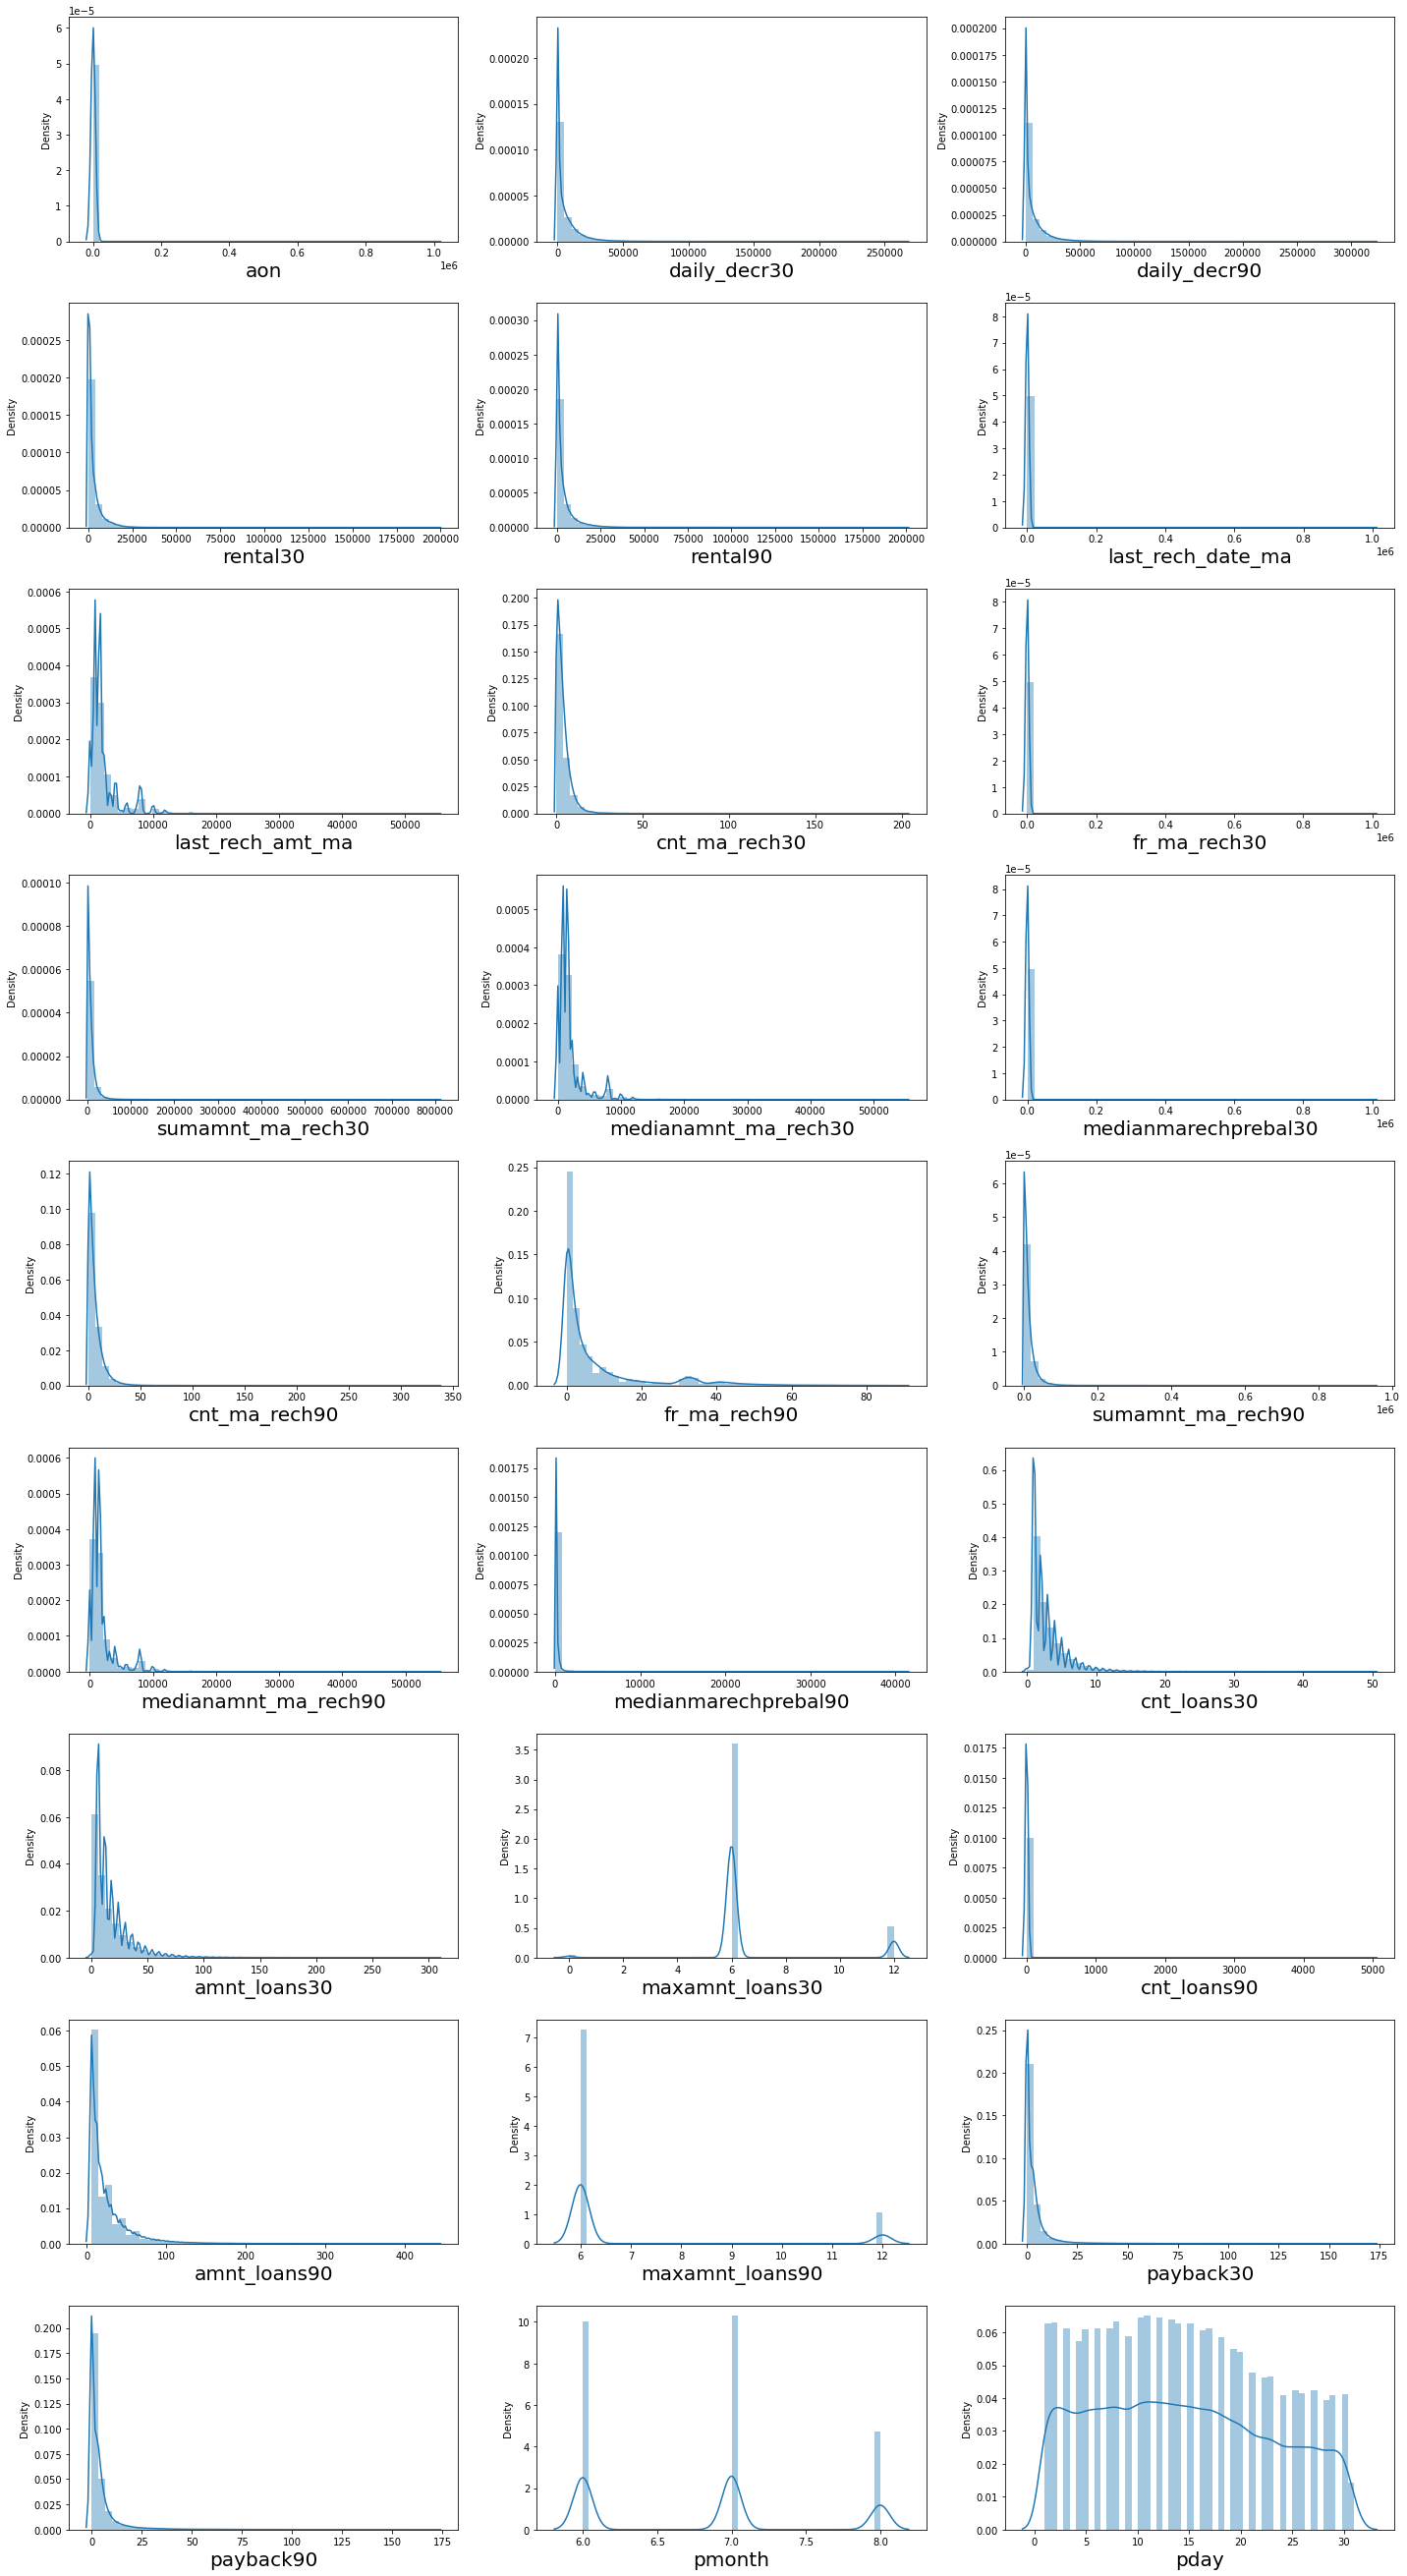

In [41]:
#Distribution plot for all numerical columns except label
plt.figure(figsize = (20,40))
plotnumber = 1
for column in df[col]:
    if plotnumber <=30:
        ax = plt.subplot(10,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

**OBSERVATIONS:**
- I can clearly see that there is skewness in most of the columns so we have to treat them.

<AxesSubplot:xlabel='label', ylabel='count'>

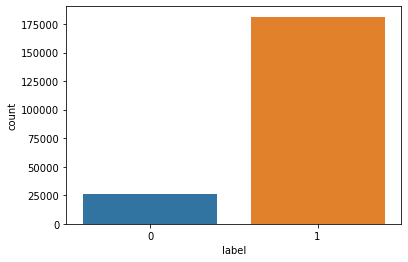

In [42]:
#count plot for target column
sns.countplot(df['label'])

There is a data imbalancing issue so we have to treat this by using oversampling or undersampling. 

# Bivariate Analysis:

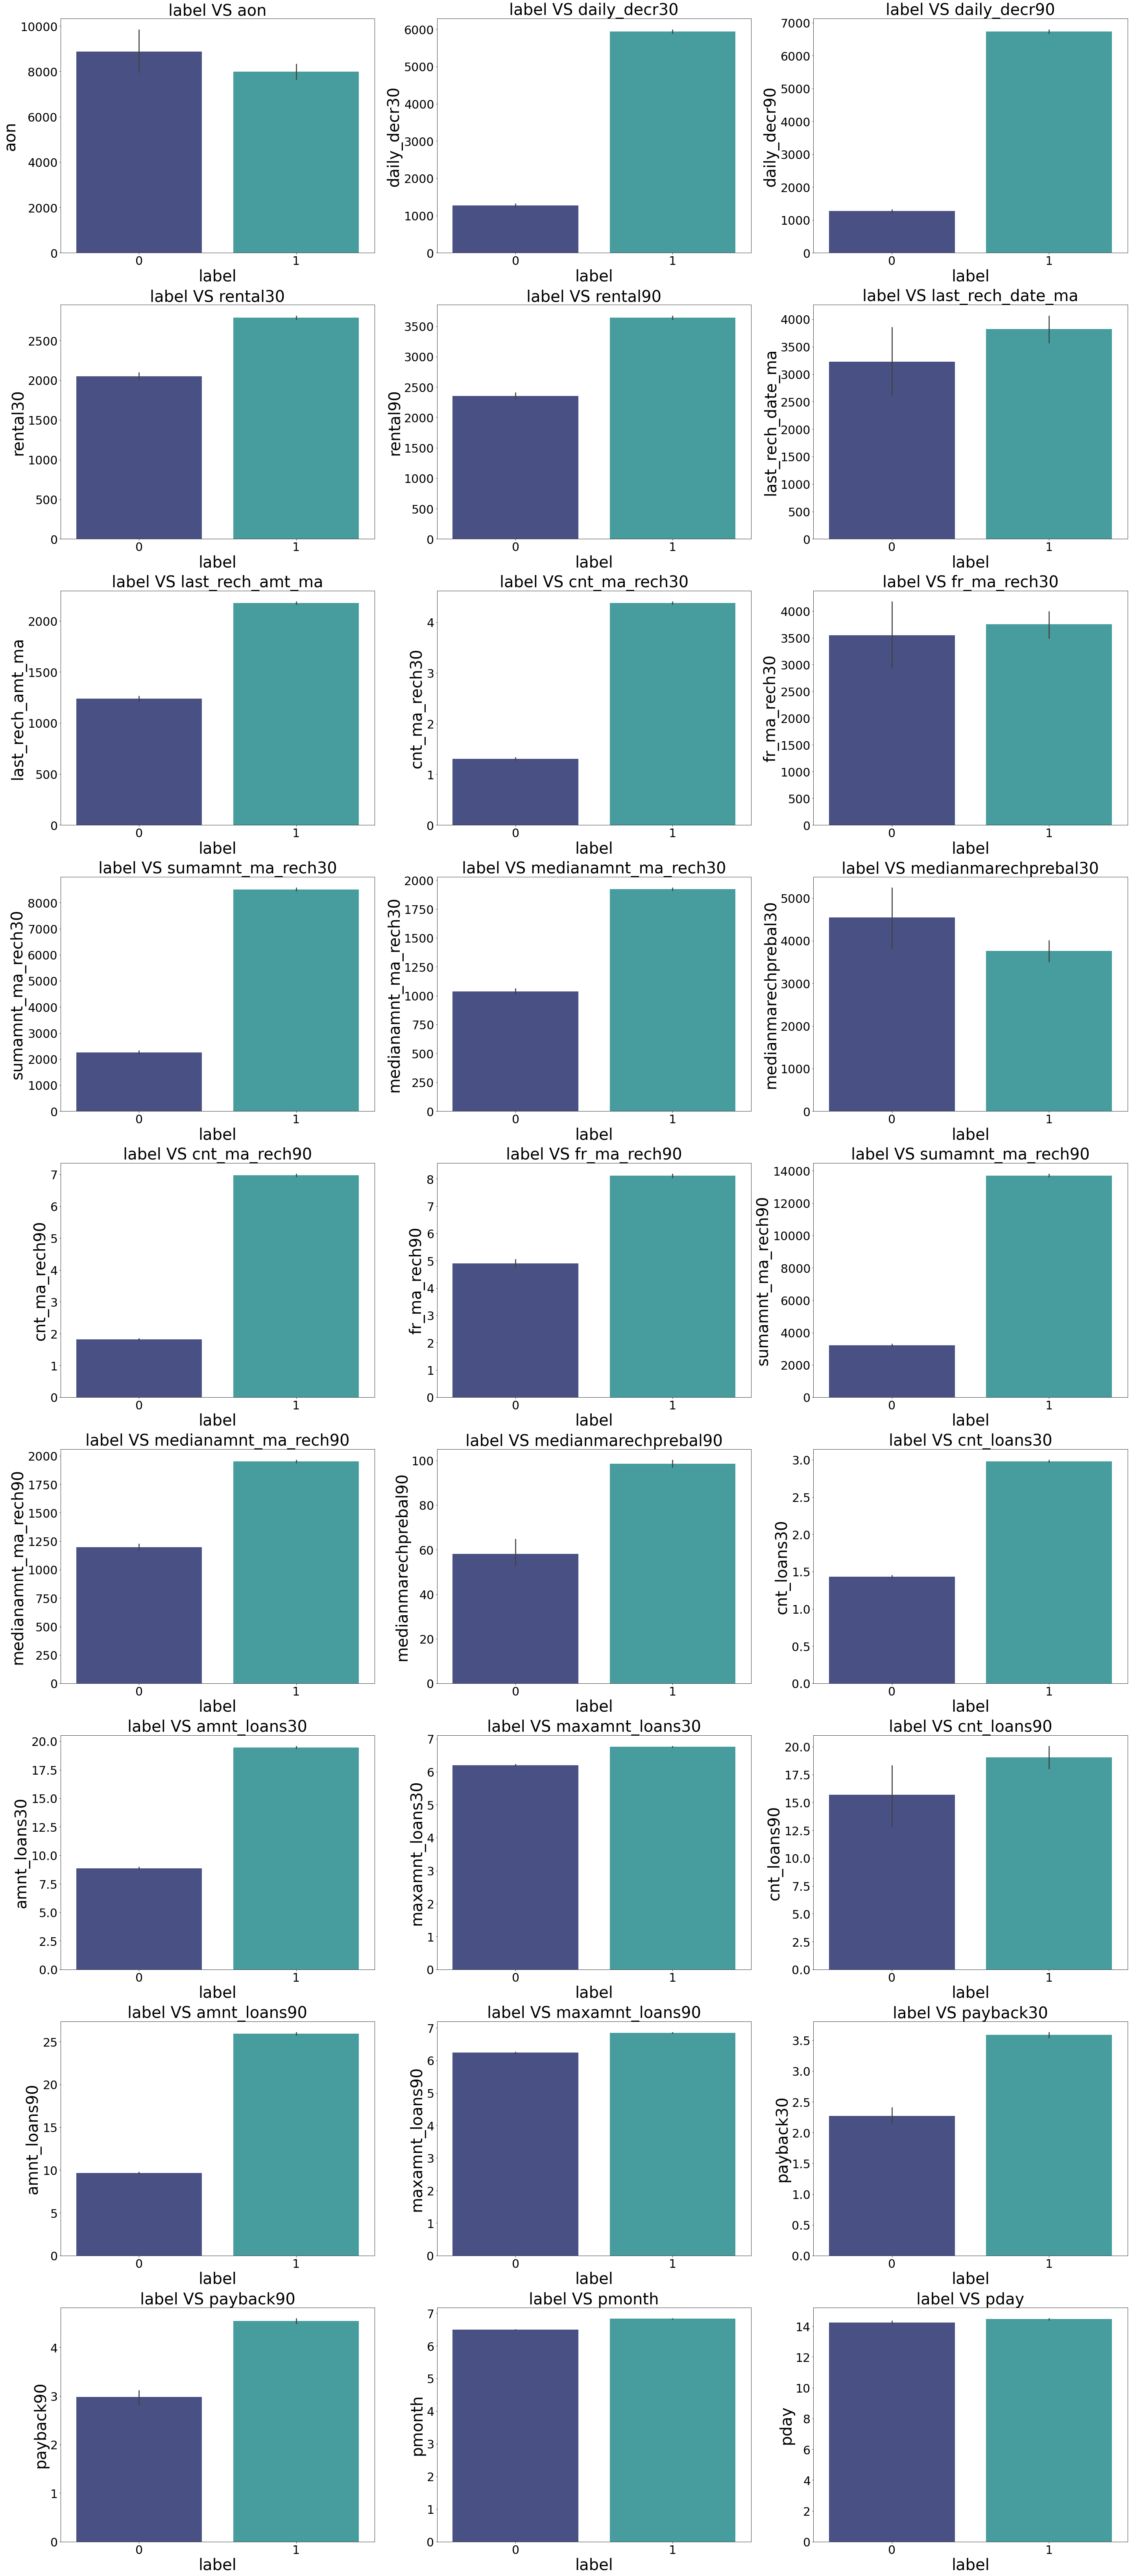

In [43]:
#barplot for numerical columns
plt.figure(figsize=(40,100))
for i in range(len(col)):
    plt.subplot(10,3,i+1)
    sns.barplot(x=df['label'], y=df[col[i]], palette="mako")
    plt.title(f"label VS {col[i]}",fontsize=40)
    plt.xticks(fontsize=30)  
    plt.yticks(fontsize=30)
    plt.xlabel('label',fontsize = 40)
    plt.ylabel(col[i],fontsize = 40)
    plt.tight_layout()

**OBSERVATIONS:**
- 1.Customers with high value of Age on cellular network in days(aon) are maximum defaulters(who have not paid there loan amount-0).
- 2.Customers with high value of Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)(daily_decr30) are maximum Non-defaulters(who have paid there loan amount-1).
- 3.Customers with high value of Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)(daily_decr90) are maximum Non-defaulters(who have paid there loan amount-1).
- 4.Customers with high value of Average main account balance over last 30 days(rental30) are maximum Non-defaulters(who have paid there loan amount-1).
- 5.Customers with high value of Average main account balance over last 90 days(rental90) are maximum Non-defaulters(who have paid there loan amount-1).
- 6.Customers with high Number of days till last recharge of main account(last_rech_date_ma) are maximum Non-defaulters(who have paid there loan amount-1).
- 7.Customers with high value of Amount of last recharge of main account (in Indonesian Rupiah)(last_rech_amt_ma) are maximum Non-defaulters(who have paid there loan amount-1).
- 8.Customers with high value of Number of times main account got recharged in last 30 days(cnt_ma_rech30) are maximum Non-defaulters(who have paid there loan amount-1).
- 9.Customers with high value of Frequency of main account recharged in last 30 days(fr_ma_rech30) are maximum Non-defaulters(who have paid there loan amount-1) and also the count is high for defaulters comparitively Non-defaulters are more in number.
- 10.Customers with high value of Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)(sumamnt_ma_rech30) are maximum Non-defaulters(who have paid there loan amount-1).
- 11.Customers with high value of Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)(medianamnt_ma_rech30) are maximum Non-defaulters(who have paid there loan amount-1).
- 12.Customers with high value of Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)(medianmarechprebal30) are maximum defaulters(who have not paid there loan amount-0).
- 13.Customers with high value of Number of times main account got recharged in last 90 days(cnt_ma_rech90) are maximum Non-defaulters(who have paid there loan amount-1).
- 14.Customers with high value of Frequency of main account recharged in last 90 days(fr_ma_rech90) are maximum Non-defaulters(who have paid there loan amount-1).
- 15.Customers with high value of Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)(sumamnt_ma_rech90) are maximum Non-defaulters(who have paid there loan amount-1).
- 16.Customers with high value of Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)(medianamnt_ma_rech90) are maximum Non-defaulters(who have paid there loan amount-1).
- 17.Customers with high value of Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)(medianmarechprebal90) are maximum Non-defaulters(who have paid there loan amount-1).
- 18.Customers with high value of Number of loans taken by user in last 30 days(cnt_loans30) are maximum Non-defaulters(who have paid there loan amount-1).
- 19.Customers with high value of Total amount of loans taken by user in last 30 days(amnt_loans30) are maximum Non-defaulters(who have paid there loan amount-1).
- 20.Customers with high value of maximum amount of loan taken by the user in last 30 days(maxamnt_loans30) are maximum Non-defaulters(who have paid there loan amount-1).
- 21.Customers with high value of Number of loans taken by user in last 90 days(cnt_loans90) are maximum Non-defaulters(who have paid there loan amount-1).
- 22.Customers with high value of Total amount of loans taken by user in last 90 days(amnt_loans90) are maximum Non-defaulters(who have paid there loan amount-1).
- 23.Customers with high value of maximum amount of loan taken by the user in last 90 days(maxamnt_loans90) are maximum Non-defaulters(who have paid there loan amount-1).
- 24.Customers with high value of Average payback time in days over last 30 days(payback30) are maximum Non-defaulters(who have paid there loan amount-1).
- 25.Customers with high value of Average payback time in days over last 90 days(payback90) are maximum Non-defaulters(who have paid there loan amount-1).
- 26.In between 6th and 7th month maximum customers both defualters and Non-defaulters have paid there loan amount.
- 27.Below 14th of each month all the customers have paid there loan amount.

# Data Cleaning:

# Checking for outliers:

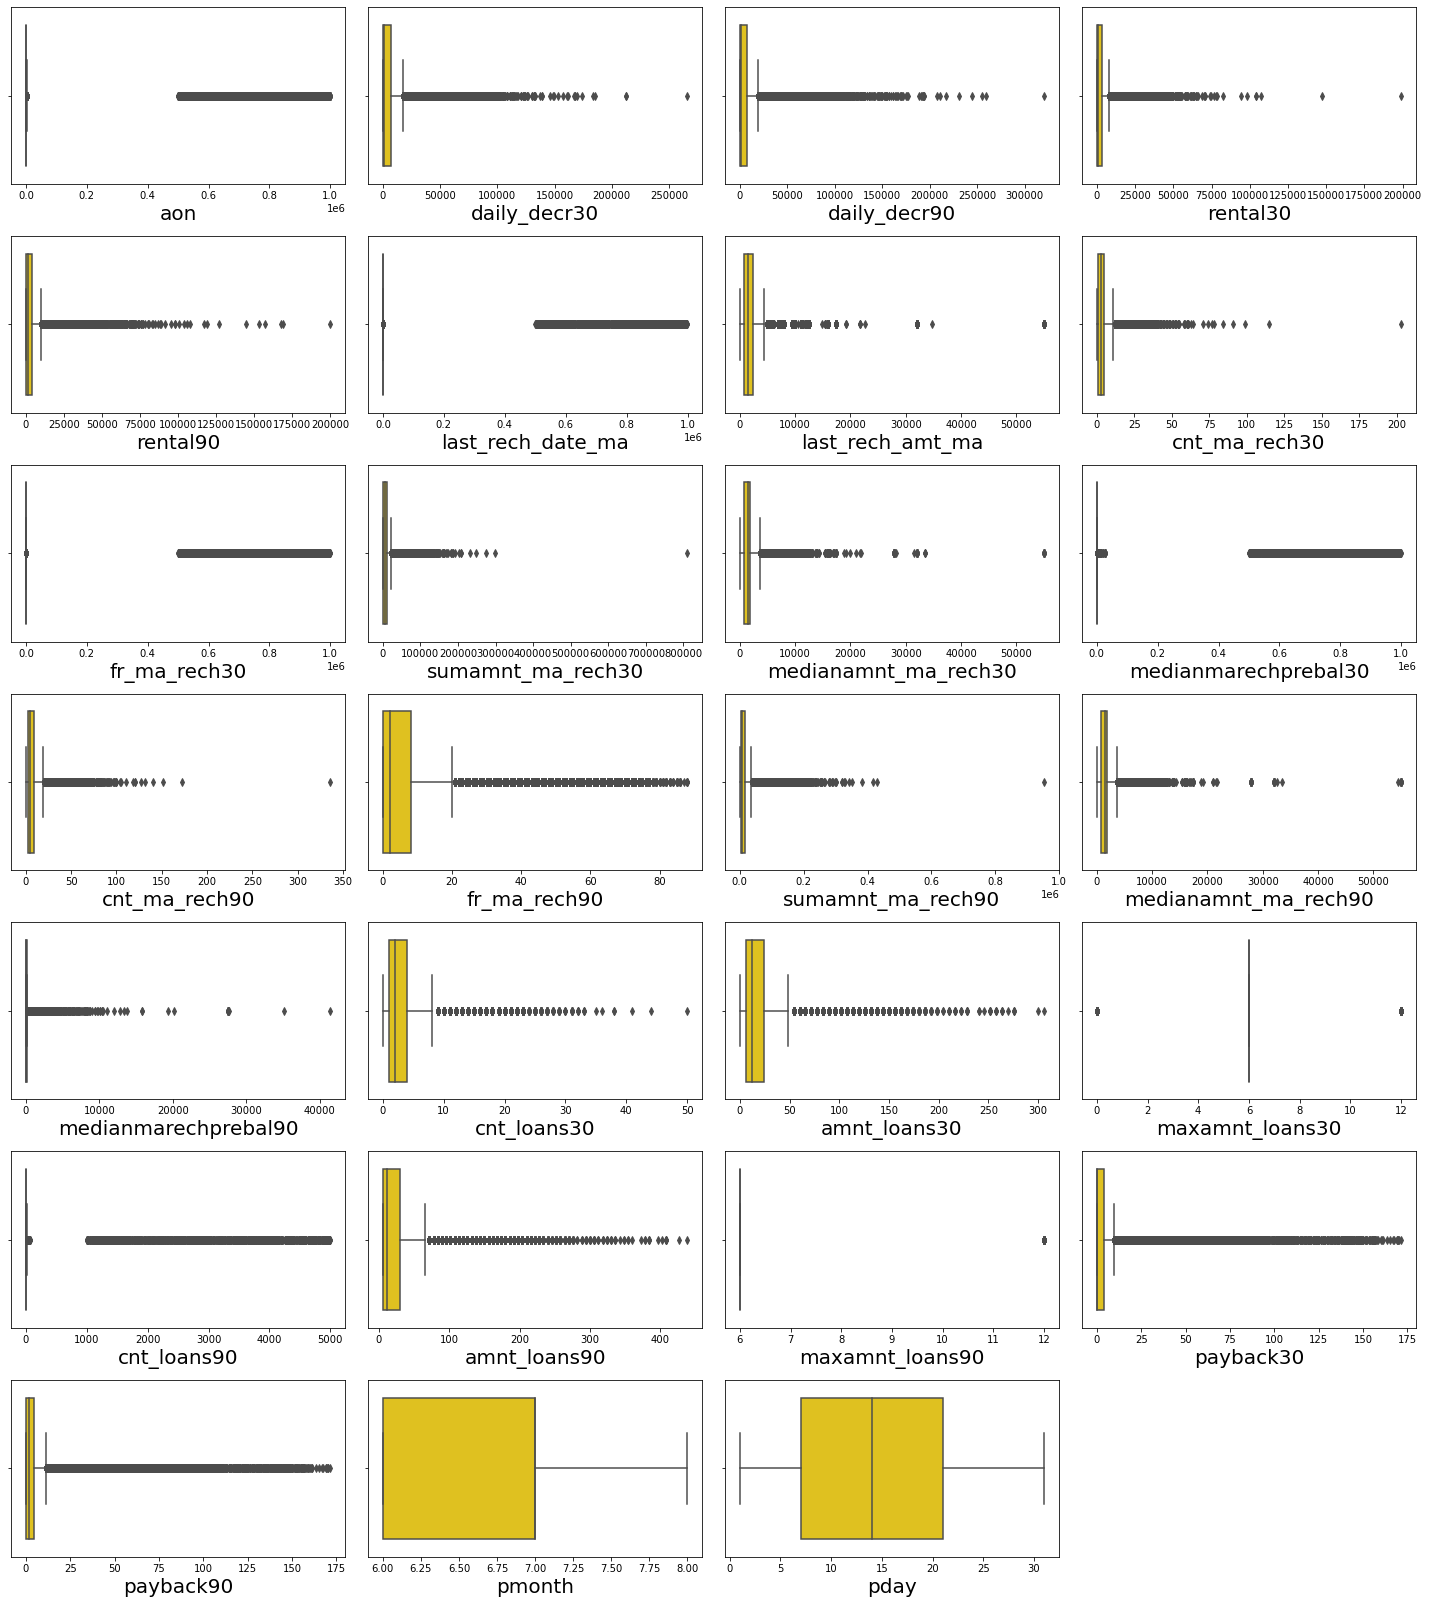

In [44]:
# Identifying the outliers using boxplot

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in col:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(df[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

There are outliers in almost all the columns except pmonth and pday.

# Removing Outliers:

# i) Zscore method:

In [45]:
#Features having outliers 
features=df[['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90']]

Above are the list of columns with outliers in the dataset.

In [46]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pmonth,pday
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,2,12,6.0,2.0,12,6,29.000000,29.000000,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,1,12,12.0,1.0,12,12,0.000000,0.000000,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,1,6,6.0,1.0,6,6,0.000000,0.000000,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,2,12,6.0,2.0,12,6,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,7,42,6.0,7.0,42,6,2.333333,2.333333,6,22


In [47]:
#Checking shape of new dataset
df_new.shape

(170071, 28)

In my new dataset i have 170071 rows and 28 columns.

In [48]:
#Checking shape of old dataset
df.shape

(207550, 28)

In my old dataset i have 207550 rows and 28 columns.

In [49]:
#Checking dataloss in zscore method
Dataloss = (((207550-170071)/207550)*100)
Dataloss

18.05781739339918

In Z-score method the data loss is more than 10% so let me have a look into IQR method to remove outliers.

# ii) IQR method:

In [50]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

I have removed the skewness of the dataset using IQR method.

In [51]:
#Checking shape of new dataset
df_1.shape

(78654, 28)

In my new dataset i have 78654 rows and 28 columns.

In [52]:
#Checking shape of old dataset
df.shape

(207550, 28)

In my old dataset i have 207550 rows and 28 columns.

In [53]:
#Checking dataloss in IQR method of the dataset
Dataloss = (((207550-78654)/207550)*100)
Dataloss

62.103589496506864

In IQR method the data loss is more than 10% so let me have a look into percentile method to remove outliers.

# iii) Percentile Method:

In [54]:
#Removing outliers using percentile method
for colu in features:
    if df[colu].dtypes != 'object':
        percentile = df[colu].quantile([0.01,0.98]).values
        df[colu][df[colu]<=percentile[0]]=percentile[0]
        df[colu][df[colu]>=percentile[1]]=percentile[1]

I have successfully removed outliers in the dataset using percentile method.

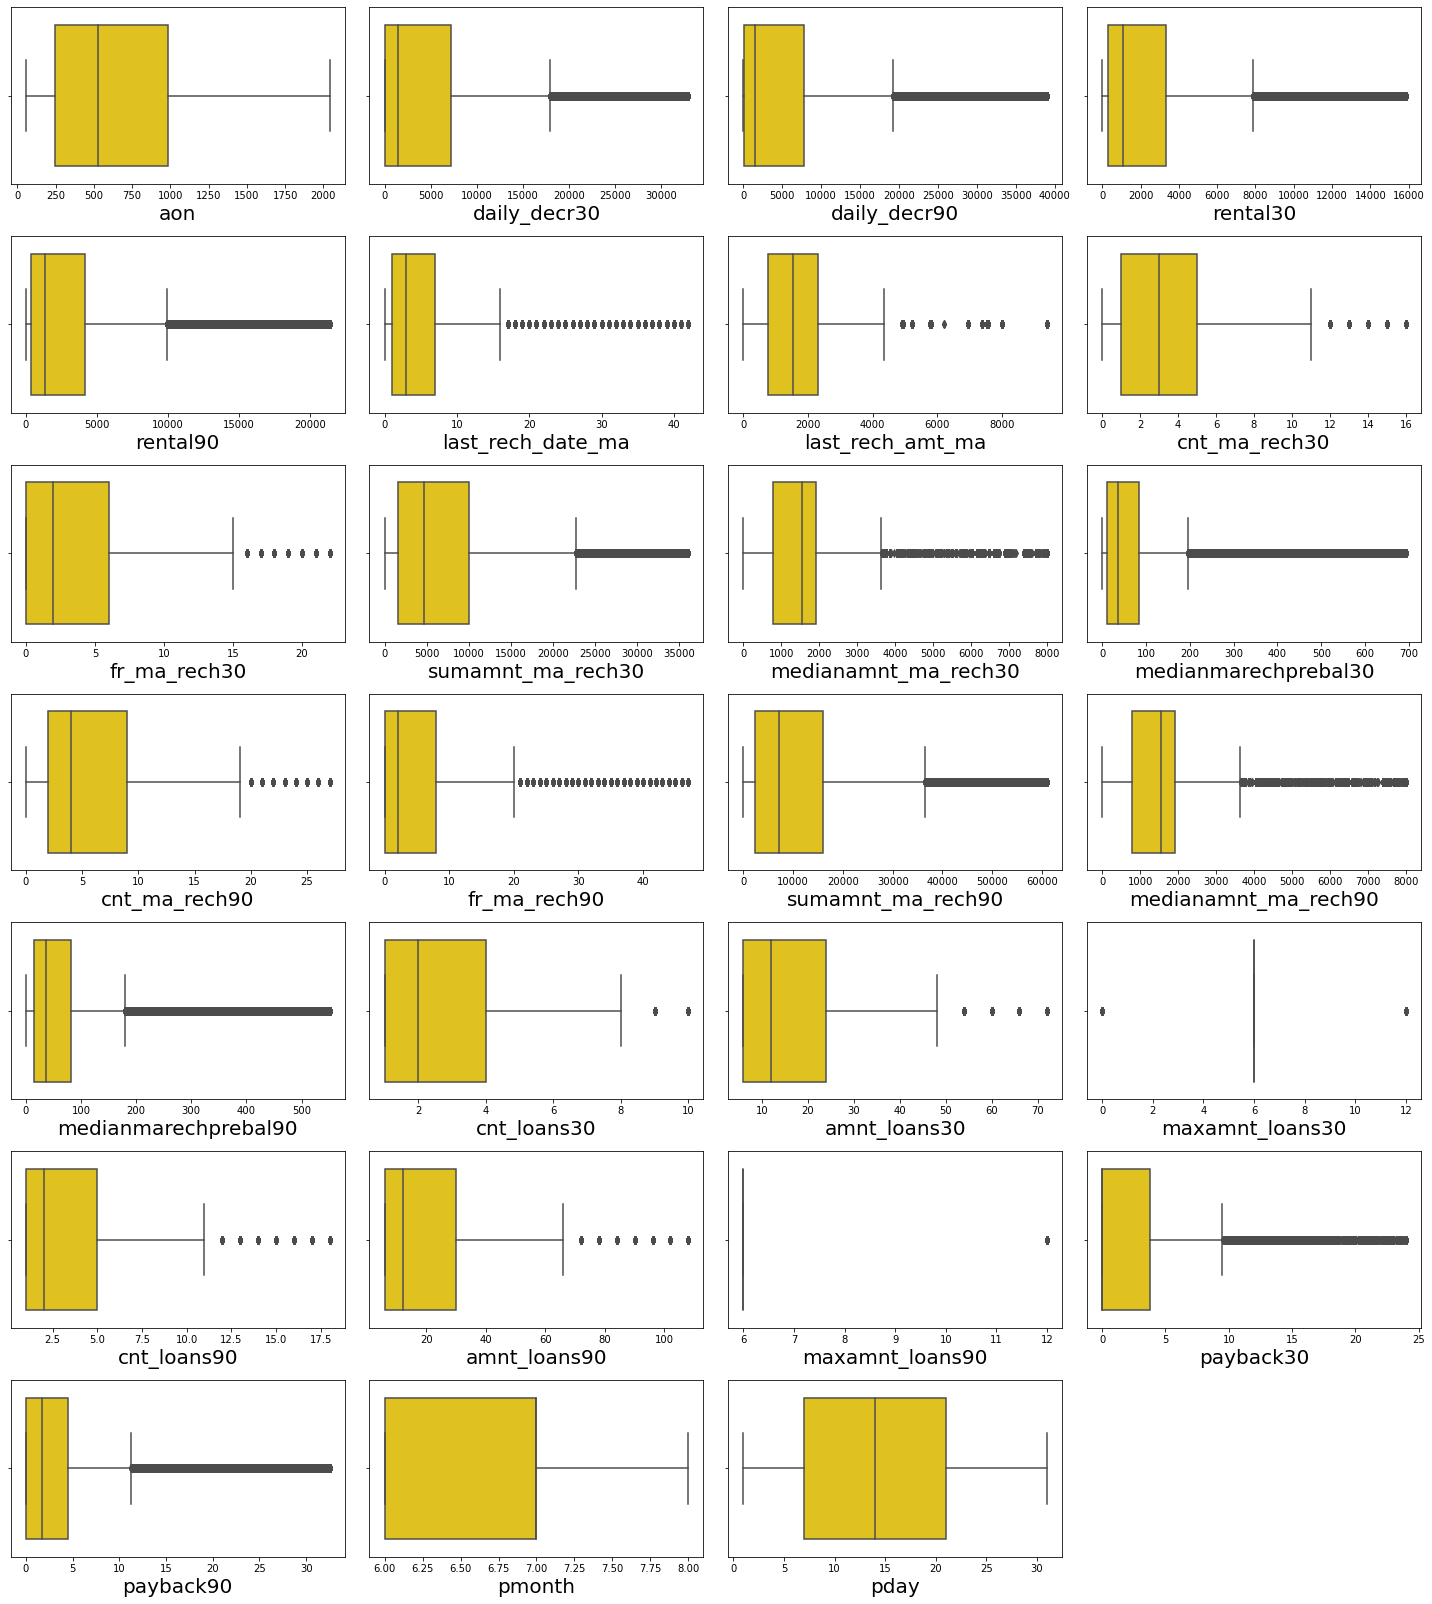

In [55]:
# Checking if the outliers is reduced or not

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in col:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(df[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Outliers has reduced in all the columns.

# Checking for skewness:

In [56]:
#Checking for skewness in the dataset
df.skew()

label                  -2.253346
aon                     0.934791
daily_decr30            1.978547
daily_decr90            2.098290
rental30                2.117210
rental90                2.205817
last_rech_date_ma       2.565623
last_rech_amt_ma        2.016661
cnt_ma_rech30           1.410702
fr_ma_rech30            1.703431
sumamnt_ma_rech30       1.749207
medianamnt_ma_rech30    2.122065
medianmarechprebal30    2.799234
cnt_ma_rech90           1.566573
fr_ma_rech90            1.987801
sumamnt_ma_rech90       1.863681
medianamnt_ma_rech90    2.143777
medianmarechprebal90    2.631175
cnt_loans30             1.597669
amnt_loans30            1.752260
maxamnt_loans30         1.634976
cnt_loans90             2.000454
amnt_loans90            1.910837
maxamnt_loans90         2.224471
payback30               2.635055
payback90               2.826565
pmonth                  0.358219
pday                    0.184762
dtype: float64

There is skewness in almost all columns except pmonth,pday and as label is my target i should not remove skewness from this column.

# Removing skewness using yeo-johnson method:

In [57]:
#Creating a list of skewed features
fea=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90']

Taking a list as fea with all the columns with skewness.

In [58]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

Using yeo_johnson method i am removing the skewness.

In [59]:
df[fea] = scaler.fit_transform(df[fea].values)

Got removed from skewness.

In [60]:
#Checking skewness again
df[fea].skew()

aon                    -0.059261
daily_decr30           -0.137650
daily_decr90           -0.127335
rental30               -0.062522
rental90               -0.062946
last_rech_date_ma       0.043916
last_rech_amt_ma       -0.106643
cnt_ma_rech30          -0.010536
fr_ma_rech30            0.131926
sumamnt_ma_rech30      -0.369147
medianamnt_ma_rech30   -0.237104
medianmarechprebal30   -0.046085
cnt_ma_rech90          -0.012334
fr_ma_rech90            0.141522
sumamnt_ma_rech90      -0.266852
medianamnt_ma_rech90   -0.101431
medianmarechprebal90   -0.029793
cnt_loans30             0.219771
amnt_loans30            0.146844
maxamnt_loans30         0.381337
cnt_loans90             0.201541
amnt_loans90            0.129122
maxamnt_loans90         2.224471
payback30               0.278283
payback90               0.193524
dtype: float64

Skewness in all the columns has been reduced.

# Checking correlation using heat map:

In [61]:
cor=df.corr()
cor

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pmonth,pday
label,1.000000,0.097208,0.266444,0.268775,0.142205,0.155661,0.064305,0.262083,0.347162,0.243564,0.361711,0.279565,0.266752,0.363878,0.221068,0.370102,0.252702,0.257523,0.276082,0.291492,0.075952,0.293548,0.309039,0.101247,0.236554,0.244596,0.151680,0.008241
aon,0.097208,1.000000,0.117096,0.117840,0.084111,0.092045,0.062278,0.097625,0.038139,0.070579,0.081316,0.097596,0.057144,0.059595,0.075794,0.098734,0.102863,0.057758,0.081993,0.087453,0.028230,0.116259,0.118862,0.038690,0.080812,0.111218,0.088821,0.016277
daily_decr30,0.266444,0.117096,1.000000,0.998435,0.585638,0.641529,0.123072,0.375006,0.498882,0.297504,0.556595,0.388856,0.274683,0.629258,0.219986,0.664160,0.364479,0.243450,0.398639,0.469091,0.329454,0.530528,0.585352,0.406822,0.336835,0.413587,0.819261,-0.005543
daily_decr90,0.268775,0.117840,0.998435,1.000000,0.586036,0.646414,0.126662,0.374533,0.494780,0.296841,0.551778,0.386170,0.273615,0.632905,0.221059,0.667208,0.364683,0.244228,0.394111,0.465628,0.329547,0.532191,0.587372,0.409956,0.334597,0.414701,0.832069,-0.012356
rental30,0.142205,0.084111,0.585638,0.586036,1.000000,0.974866,0.055640,0.284950,0.457289,0.248717,0.483215,0.321685,0.224043,0.513308,0.162761,0.520826,0.273283,0.180335,0.351445,0.391547,0.229190,0.426924,0.457818,0.279351,0.313625,0.349548,0.420241,0.104843
rental90,0.155661,0.092045,0.641529,0.646414,0.974866,1.000000,0.086931,0.294793,0.450131,0.251783,0.473789,0.314687,0.221703,0.541062,0.176180,0.546615,0.282589,0.189007,0.344863,0.391728,0.243832,0.447225,0.482003,0.306454,0.311970,0.368359,0.505436,0.088389
last_rech_date_ma,0.064305,0.062278,0.123072,0.126662,0.055640,0.086931,1.000000,0.518141,-0.016311,0.062349,0.120058,0.330315,0.193080,0.097029,0.220031,0.250383,0.507557,0.338033,-0.076541,-0.067983,-0.004410,-0.027212,-0.022283,0.016073,-0.094731,-0.020555,0.070518,0.032959
last_rech_amt_ma,0.262083,0.097625,0.375006,0.374533,0.284950,0.294793,0.518141,1.000000,0.324761,0.274736,0.656182,0.815169,0.428939,0.375053,0.337799,0.702025,0.902231,0.490820,0.184620,0.221013,0.147657,0.216948,0.246442,0.185654,0.147133,0.184311,0.152274,0.060133
cnt_ma_rech30,0.347162,0.038139,0.498882,0.494780,0.457289,0.450131,-0.016311,0.324761,1.000000,0.416578,0.857169,0.414204,0.483347,0.921898,0.221113,0.780681,0.289736,0.390532,0.732750,0.738661,0.176343,0.710656,0.723829,0.194797,0.546307,0.488019,0.199803,0.097776
fr_ma_rech30,0.243564,0.070579,0.297504,0.296841,0.248717,0.251783,0.062349,0.274736,0.416578,1.000000,0.459433,0.381396,0.304847,0.409782,0.616698,0.422094,0.294093,0.225942,0.339864,0.349147,0.090392,0.351095,0.362987,0.102128,0.415946,0.394390,0.135763,0.081552


Above are the correlations of all the pair of features.To get better visualization on the correlation of features,let me plot it using heat map.

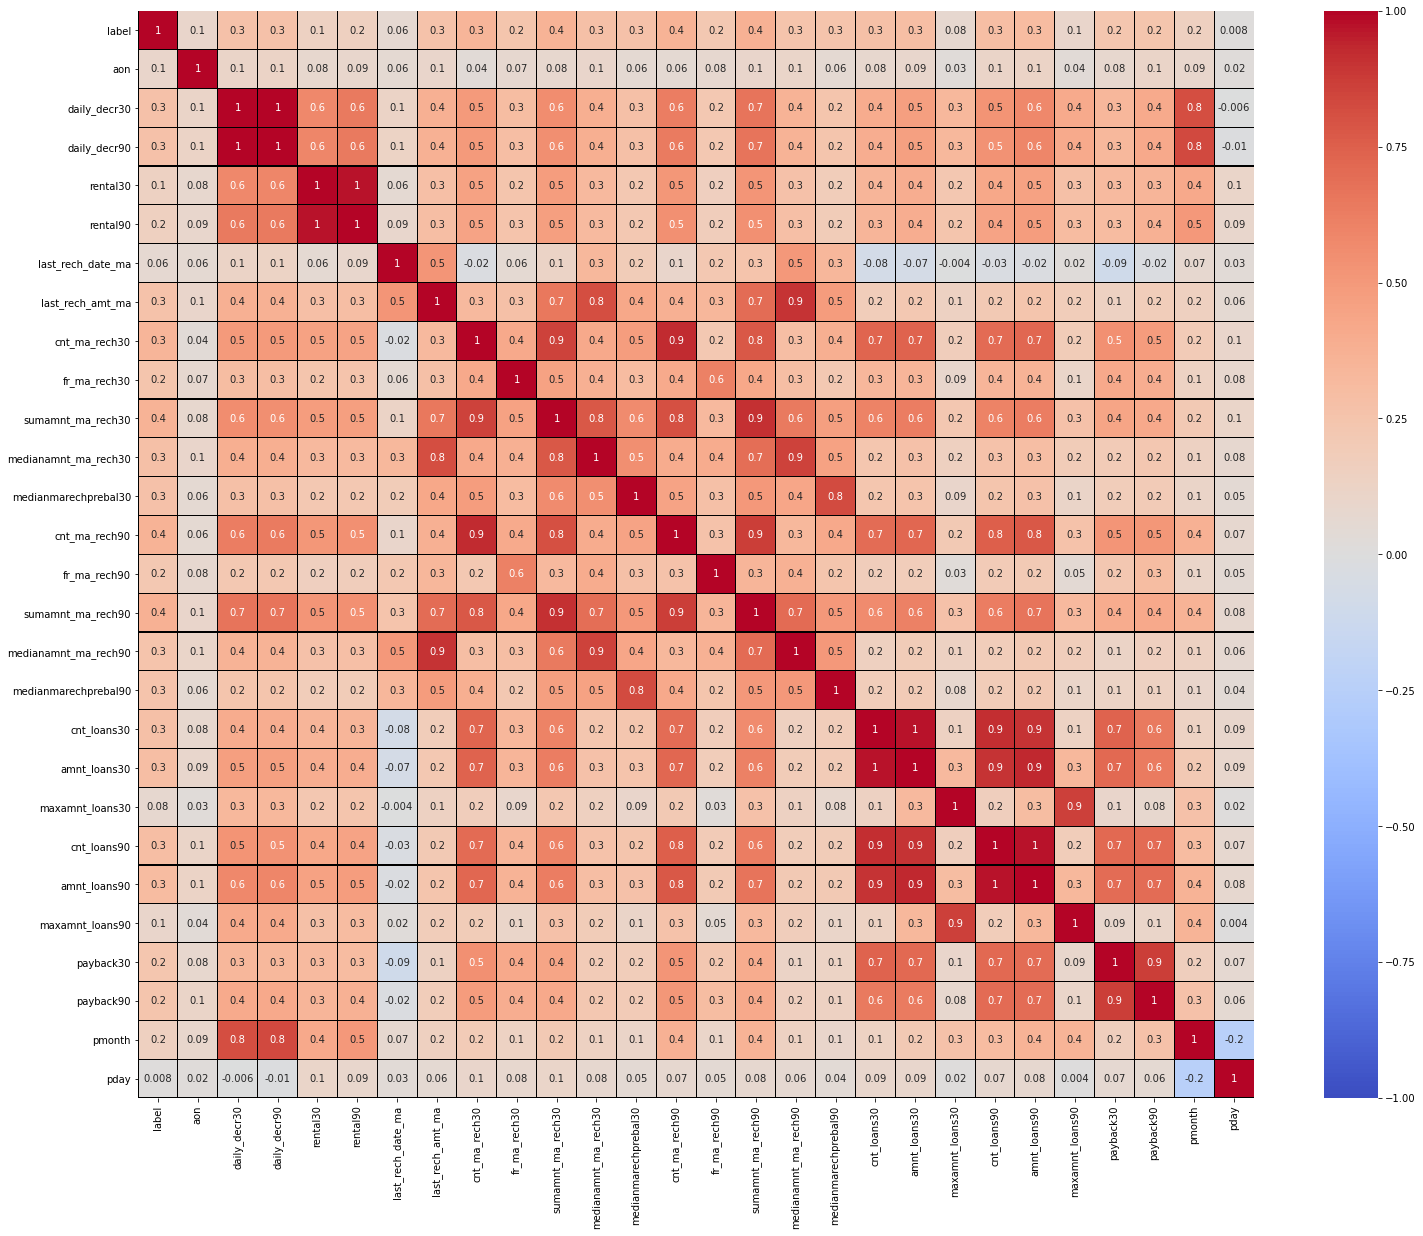

In [62]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

Let's visualize the correlation of all the features with target to get better insight.

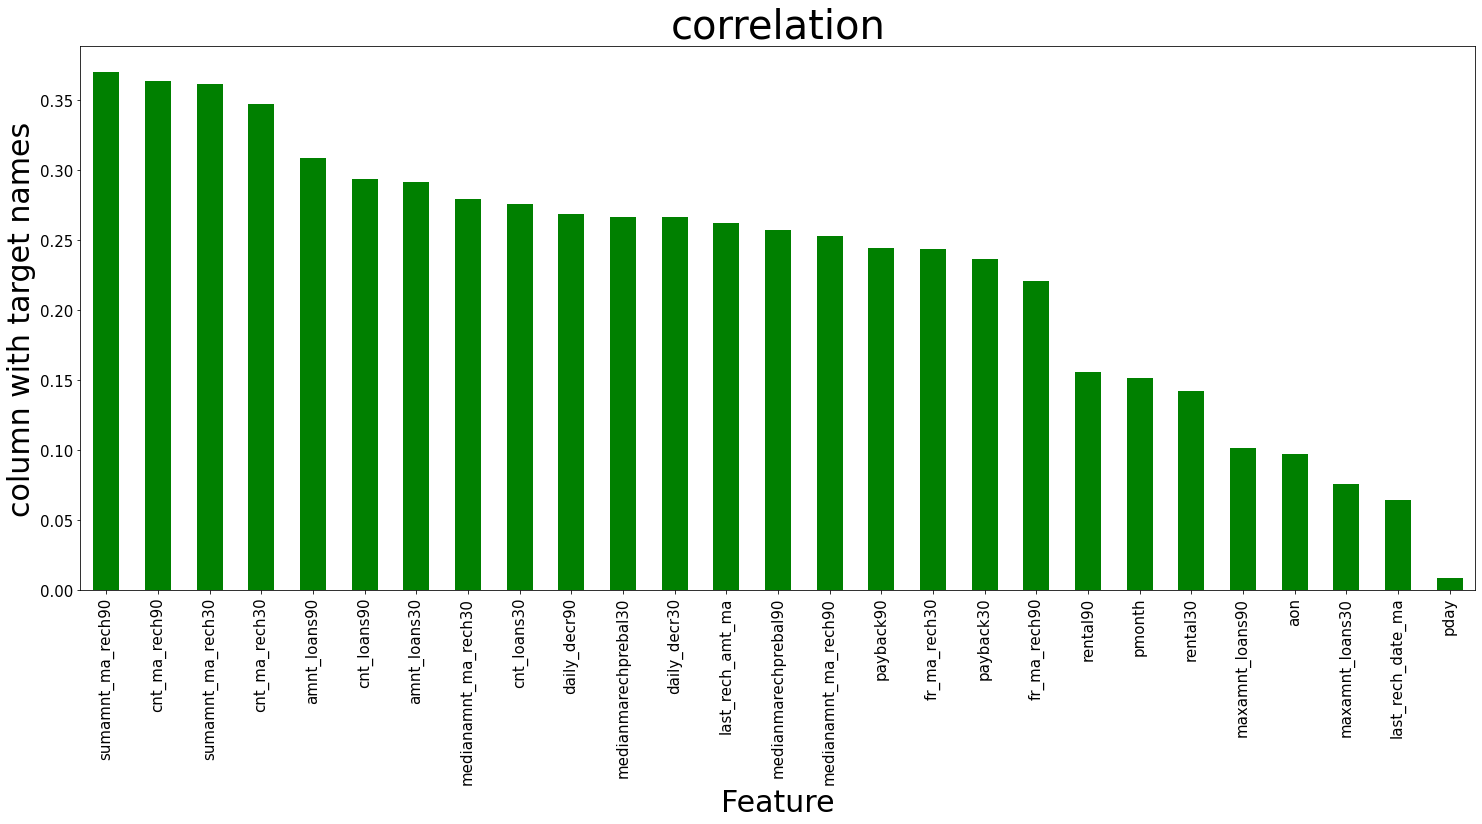

In [63]:
plt.figure(figsize=(25,10))
df.corr()['label'].sort_values(ascending=False).drop(['label']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=30)
plt.ylabel('column with target names',fontsize=30)
plt.xticks(fontsize=15)  
plt.yticks(fontsize=15)
plt.title('correlation',fontsize=40)
plt.show()

We don't find any columns with negligible correlation. Even though pday is less correlated we can keep it and preceed.

# Separating Features and Target:

In [64]:
x = df.drop("label",axis=1)
y = df["label"]

I have separated my target and independent columns.

# Scaling the data using MinMax scaler:

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

I have scaled my data using MinMax scaler.

In [66]:
X.head()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pmonth,pday
0,0.348970,0.670388,0.661447,0.330465,0.335513,0.378383,0.498865,0.368297,0.990879,0.435328,0.523791,0.239198,0.307937,0.870329,0.378257,0.515526,0.231859,0.392540,0.378664,0.633603,0.312710,0.321358,0.0,1.000000,0.984592,0.5,0.633333
1,0.625204,0.851665,0.834288,0.706042,0.668524,0.865622,0.831756,0.229617,0.000000,0.540837,0.881977,0.529616,0.191924,0.000000,0.466745,0.879174,0.533388,0.000000,0.378664,1.000000,0.000000,0.321358,1.0,0.000000,0.000000,1.0,0.300000
2,0.537141,0.578404,0.572448,0.491889,0.470866,0.463708,0.498865,0.229617,0.000000,0.341592,0.523791,0.543230,0.191924,0.000000,0.298987,0.515526,0.547997,0.000000,0.000000,0.633603,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.600000
3,0.318099,0.196647,0.198199,0.299475,0.290305,0.995905,0.411921,0.000000,0.000000,0.000000,0.000000,0.000000,0.191924,0.000000,0.252713,0.422273,0.125813,0.392540,0.378664,0.633603,0.312710,0.321358,0.0,0.000000,0.000000,0.0,0.166667
4,0.718606,0.353656,0.353543,0.518649,0.495734,0.526388,0.584318,0.717633,0.448169,0.822222,0.615344,0.414665,0.636788,0.391346,0.736845,0.665467,0.440867,0.910035,0.859875,0.633603,0.784192,0.767230,0.0,0.574148,0.497077,0.0,0.700000


This is the data of independent variables after scaling.

# Balancing the target variable using oversampling:

In [67]:
#Checking the value count of target column
y.value_counts()

1    181388
0     26162
Name: label, dtype: int64

In [68]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X, y = SM.fit_resample(X,y)

In [69]:
# Checking the value counts again
y.value_counts()

1    181388
0    181388
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

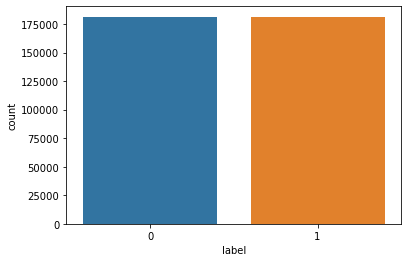

In [70]:
# Visualizing the target data after oversampling
sns.countplot(y)

Now the data looks beautifully balanced.

# Finding Best Random State and Accuracy:

In [71]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [72]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = DecisionTreeClassifier()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9145939191237952  on Random_state  44


Got the best accuracy and random state.

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

Created train and test data.

# Classification Algorithms:

In [74]:
#importing necessary libraries.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_score

# i) XGB Classifier:

In [75]:
XGB=XGBClassifier(verbosity=0)
XGB.fit(X_train,y_train)
predxg=XGB.predict(X_test)
Accuracy_Score = accuracy_score(y_test, predxg)*100
print('Accuracy Score:',Accuracy_Score)
print('Confusion Matrix:',confusion_matrix(y_test, predxg))
print(classification_report(y_test,predxg))

#cross validation score
scores = cross_val_score(XGB, X, y, cv = 5).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = Accuracy_Score - scores
print("\Accuracy_Score - Cross Validation Score :", diff)

Accuracy Score: 95.08513042918968
Confusion Matrix: [[51328  3170]
 [ 2179 52156]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     54498
           1       0.94      0.96      0.95     54335

    accuracy                           0.95    108833
   macro avg       0.95      0.95      0.95    108833
weighted avg       0.95      0.95      0.95    108833


Cross validation score : 93.61152650215881
\Accuracy_Score - Cross Validation Score : 1.4736039270308652


XGBClassifier is giving me 95% accuracy.

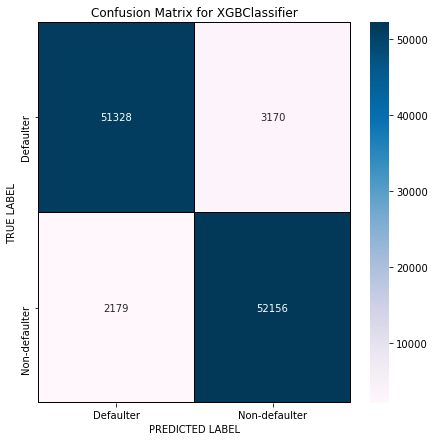

In [76]:
cm = confusion_matrix(y_test, predxg)

x_axis_labels = ["Defaulter","Non-defaulter"]
y_axis_labels = ["Defaulter","Non-defaulter"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="PuBu", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for XGBClassifier')
plt.show()

We can see the true values and predicted values in XGB Classifier model using confusion matrix.

# ii) DecisionTreeClassifier:

In [77]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train,y_train)
preddt=DTC.predict(X_test)
Accuracy_Score = accuracy_score(y_test, preddt)*100
print('Accuracy Score:',Accuracy_Score)
print('Confusion Matrix:',confusion_matrix(y_test, preddt))
print(classification_report(y_test,preddt))

#cross validation score
scores = cross_val_score(DTC, X, y, cv = 5).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = Accuracy_Score - scores
print("\Accuracy_Score - Cross Validation Score :", diff)

Accuracy Score: 91.48603824207731
Confusion Matrix: [[50249  4249]
 [ 5017 49318]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.92     54498
           1       0.92      0.91      0.91     54335

    accuracy                           0.91    108833
   macro avg       0.91      0.91      0.91    108833
weighted avg       0.91      0.91      0.91    108833


Cross validation score : 90.84864335007254
\Accuracy_Score - Cross Validation Score : 0.6373948920047781


DecisionTreeClassifier is giving me 92% accuracy.

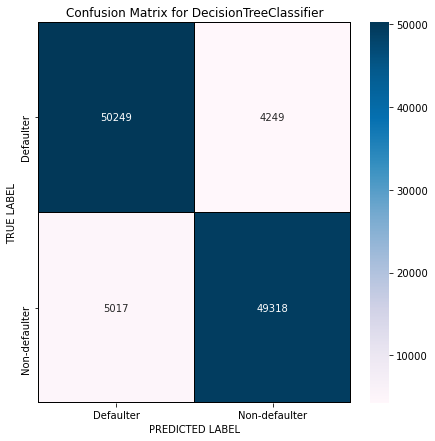

In [78]:
cm = confusion_matrix(y_test, preddt)

x_axis_labels = ["Defaulter","Non-defaulter"]
y_axis_labels = ["Defaulter","Non-defaulter"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="PuBu", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for DecisionTreeClassifier')
plt.show()

We can see the true values and predicted values in DecisionTreeClassifier model using confusion matrix.

# iii) BaggingClassifier:

In [79]:
BC=BaggingClassifier()
BC.fit(X_train,y_train)
predbc=BC.predict(X_test)
Accuracy_Score = accuracy_score(y_test, predbc)*100
print('Accuracy Score:',Accuracy_Score)
print('Confusion Matrix:',confusion_matrix(y_test, predbc))
print(classification_report(y_test,predbc))

#cross validation score
scores = cross_val_score(BC, X, y, cv = 5).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = Accuracy_Score - scores
print("\Accuracy_Score - Cross Validation Score :", diff)

Accuracy Score: 94.14423933917102
Confusion Matrix: [[52001  2497]
 [ 3876 50459]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     54498
           1       0.95      0.93      0.94     54335

    accuracy                           0.94    108833
   macro avg       0.94      0.94      0.94    108833
weighted avg       0.94      0.94      0.94    108833


Cross validation score : 93.53184067236523
\Accuracy_Score - Cross Validation Score : 0.6123986668057881


BaggingClassifier is giving me 94% accuracy.

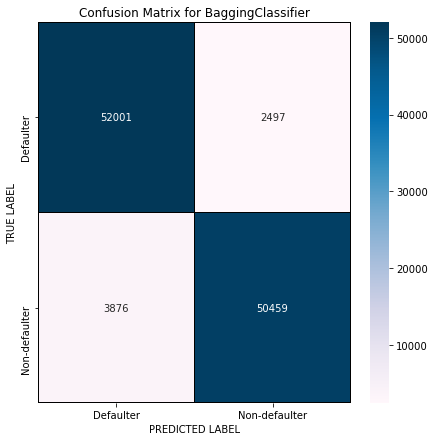

In [80]:
cm = confusion_matrix(y_test, predbc)

x_axis_labels = ["Defaulter","Non-defaulter"]
y_axis_labels = ["Defaulter","Non-defaulter"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="PuBu", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for BaggingClassifier')
plt.show()

We can see the true values and predicted values in BaggingClassifier model using confusion matrix.

# iv) AdaBoostClassifier:

In [81]:
ABC=AdaBoostClassifier()
ABC.fit(X_train,y_train)
predab=ABC.predict(X_test)
Accuracy_Score = accuracy_score(y_test, predab)*100
print('Accuracy Score:',Accuracy_Score)
print('Confusion Matrix:',confusion_matrix(y_test, predab))
print(classification_report(y_test,predab))

#cross validation score
scores = cross_val_score(ABC, X, y, cv = 5).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = Accuracy_Score - scores
print("\Accuracy_Score - Cross Validation Score :", diff)

Accuracy Score: 85.35830125053981
Confusion Matrix: [[47255  7243]
 [ 8692 45643]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.86     54498
           1       0.86      0.84      0.85     54335

    accuracy                           0.85    108833
   macro avg       0.85      0.85      0.85    108833
weighted avg       0.85      0.85      0.85    108833


Cross validation score : 85.05883456981478
\Accuracy_Score - Cross Validation Score : 0.2994666807250326


AdaBoost Classifier is giving me 85% accuracy.

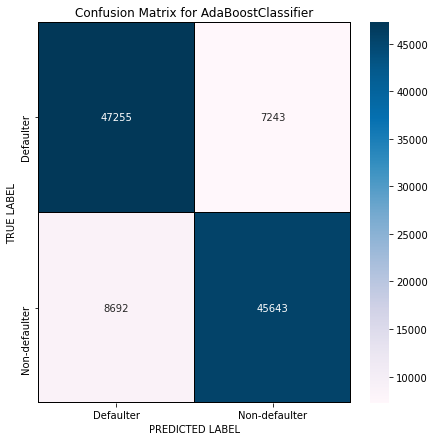

In [82]:
cm = confusion_matrix(y_test, predab)

x_axis_labels = ["Defaulter","Non-defaulter"]
y_axis_labels = ["Defaulter","Non-defaulter"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="PuBu", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for AdaBoostClassifier')
plt.show()

We can see the true values and predicted values in AdaboostClassifier model using confusion matrix.

**By looking into the difference of model accuracy and cross validation score i found BaggingClassifier as the best model with 95.16% accuracy and the difference between model accuracy and cross validation score is 0.44.**

# ROC-AUC curve:

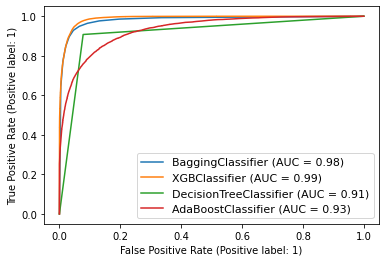

In [83]:
# Plotting ROC for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 
disp = plot_roc_curve(BC,X_test,y_test)
plot_roc_curve(XGB, X_test, y_test, ax=disp.ax_)
plot_roc_curve(DTC, X_test, y_test, ax=disp.ax_)
plot_roc_curve(ABC, X_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

Above is the ROC curves for all the models that i have predicted.And the AUC values can also be seen in the plot.

- AUC value is high for XGBClassifier and BaggingClassifier.I got least difference in model accuracy and cross validation score for BaggingClassifier so BC is my best model.

# Hyper Parameter tuning:

In [84]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [85]:
parameter = {'bootstrap':['True','False'],
             'n_jobs': [-2,-1,1,2],
             'n_estimators':[10,20,30,40],
             'warm_start':['True','False']}

Giving the parameters list for BaggingClassifier model.

In [86]:
GCV=GridSearchCV(BaggingClassifier(),parameter,cv=5)

Running grid search CV for BaggingClassifier.

In [87]:
GCV.fit(X_train,y_train)

KeyboardInterrupt: 

Training the model with GCV.

In [88]:
GCV.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

Got the best parameters for BaggingClassifier.

In [ ]:
Final_mod=BaggingClassifier(bootstrap='True', n_jobs=-1,warm_start='True', n_estimators=40)
Final_mod.fit(X_train,y_train)
pred=Final_mod.predict(X_test)
acc=accuracy_score(y_test, pred)

print('Accuracy Score:',(accuracy_score(y_test,pred)*100))
print('Confusion matrix:',confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Great our model accuracy has increased from **94.16%** to **94.82%** which is good!!!

# AUC ROC CURVE for final model:

In [ ]:
#Ploting ROC curve for final best model
plot_roc_curve(Final_mod, X_test, y_test)
plt.title('ROC Curve for final best model')
plt.show()

Great after hyperparameter tuning we got improvement in roc curve and AUC also.

# Saving the model:

In [ ]:
#Saving the model as .pkl file
import joblib
joblib.dump(Final_mod,"MicroCreditLoan.pkl")

I have saved the final best model as MicroCreditLoan.Using .pkl.

# Predictions:

In [ ]:
# Loading the saved model
model=joblib.load("MicroCreditLoan.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

In [ ]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

Above are the predicted values and the actual values.They are almost similar.

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("BaggingClassifier")
plt.show()

Plotting Actual vs Predicted,To get better insight.Bule line is the actual line and red dots are the predicted values.

# ThankYou